# Plotting results
This Notebook shows you differences between 3 different integration algorithms for one-dimensional functions $f(x)$.
I have used three test functions:

Gaussian distribution $f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Exponential distribution $f(x) = \theta(x)\hspace{0.5 mm} N \hspace{0.5 mm} e^{-\alpha x} $

Line function $f(x) = mx + q$

#### Importing modules

In [1]:
import matplotlib.pyplot as plt
import numpy
import math

## Gaussian distribution
Definition of the right integral in the interval $[\mu,x]$ with $x>\mu$.

Analytical integral is: $$\frac{1}{\sqrt{2\pi\sigma^2}}\int_\mu^x e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx = \frac{1}{2}\mathcal{erf}\left( \frac{x}{\sqrt{2}\sigma} \right)$$

In [2]:
def gauss_integral(x, sigma=2.6):
    return 0.5*math.erf(x/sigma/math.sqrt(2))

analyticalIntegral = gauss_integral(4)
print("Analytical integral is:", analyticalIntegral)

Analytical integral is: 0.4380320971636288


Unpacking file

In [3]:
numbers, MC_int, Trap_int, Rect_int = numpy.loadtxt("gaussian_data.txt", unpack=True)

Plotting resutlts for Gaussian function

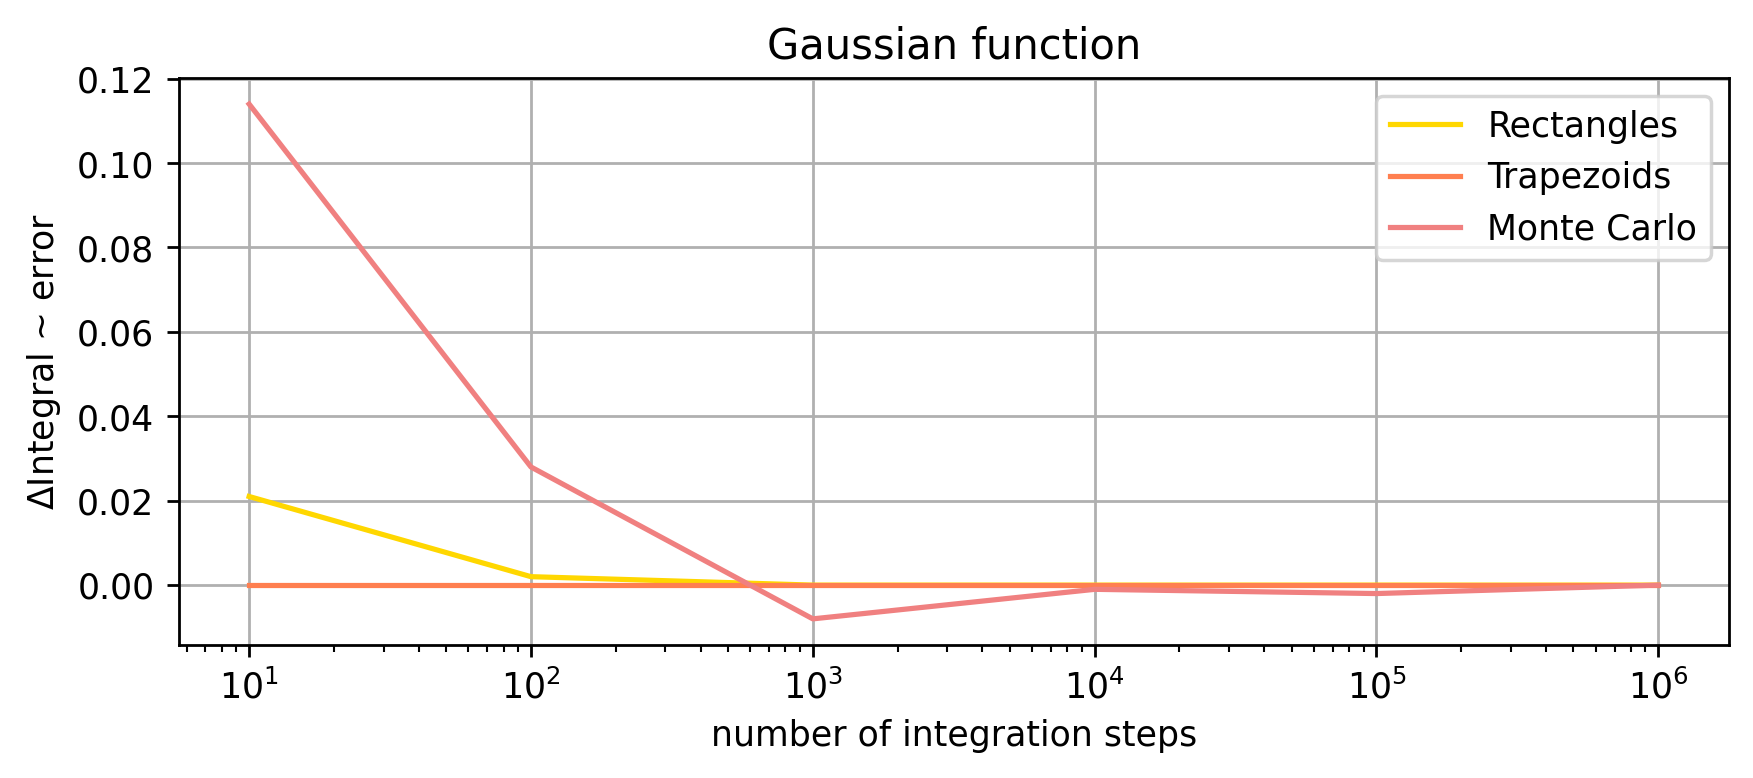

In [4]:
%matplotlib inline
plt.figure("PlotGaussian", figsize=(8,3) , dpi=250)
plt.xscale('log')
plt.xlabel("number of integration steps")
plt.ylabel("$\Delta$Integral ~ error")
plt.title("Gaussian function")
plt.plot(numbers, Rect_int - analyticalIntegral, label='Rectangles', color='gold')
plt.plot(numbers, Trap_int - analyticalIntegral, label='Trapezoids', color='coral')
plt.plot(numbers, MC_int - analyticalIntegral, label='Monte Carlo', color='lightcoral')
plt.legend()
plt.grid()
plt.show()

## Exponential distribution
Definition of the right integral in the interval $[a,b]$ with $a\ge0$.

Analytical integral is: $$\int_a^b Ne^{-\alpha x}dx = \frac{N}{\alpha}(e^{-\alpha b} - e^{-\alpha a})$$

In [5]:
def exp_integral(a, b, N=1, alpha=1):
    return (N/alpha)*(math.exp(-alpha*a) - math.exp(-alpha*b))

analyticalIntegral = exp_integral(0.5, 3, N=12, alpha=0.53)
print("Analytical integral is: ", analyticalIntegral)

Analytical integral is:  12.753517092263598


Unpacking file

In [6]:
numbers, MC_int, Trap_int, Rect_int = numpy.loadtxt("exponential_data.txt", unpack=True)

Plotting results for exponential function

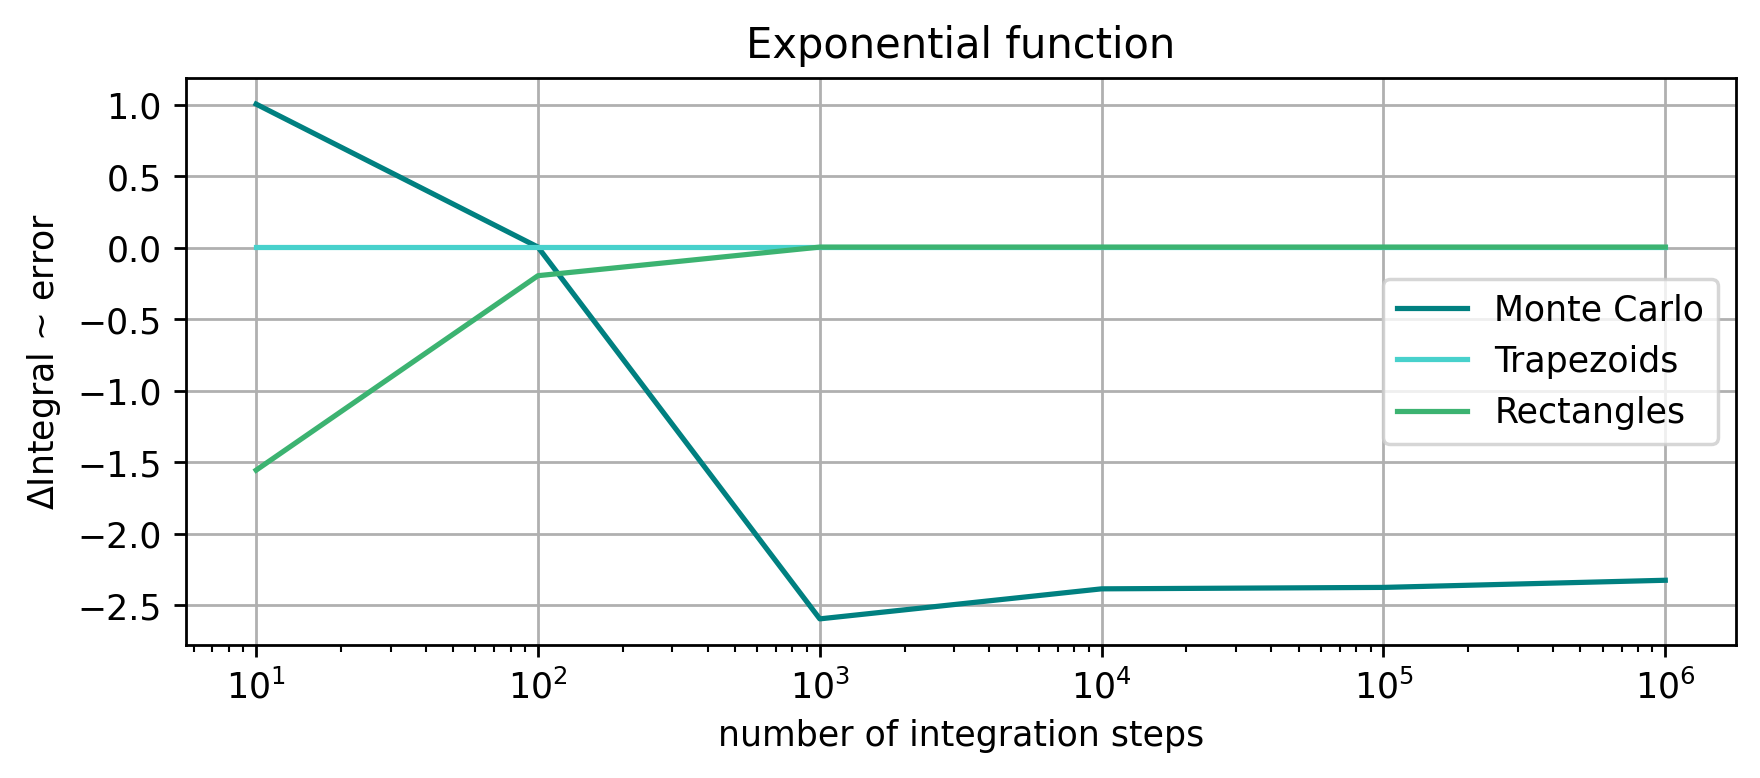

In [13]:
%matplotlib inline
plt.figure("PlotExponential", figsize=(8,3) , dpi=250)
plt.xscale('log')
plt.xlabel("number of integration steps")
plt.ylabel("$\Delta$Integral ~ error")
plt.title("Exponential function")
plt.plot(numbers, MC_int - analyticalIntegral, label='Monte Carlo', color='teal')
plt.plot(numbers, Trap_int - analyticalIntegral, label='Trapezoids', color='mediumturquoise')
plt.plot(numbers, Rect_int - analyticalIntegral, label='Rectangles', color='mediumseagreen')
plt.grid()
plt.legend()
plt.show()

## Line function
Definition of the right integral in the interval $[a,b]$.

Analytical integral is: $$\int_a^b (mx+q)dx= \frac{m}{2}\left(b-a\right)^2+q(b-a)$$

In [8]:
def line_integral(a, b, m=1, q=0):
    return (0.5*m*(b*b-a*a)+q*(b-a))

analyticalIntegral = line_integral(-0.1, 0.6, m=63.4, q=0)
print("Analytical integral is:", analyticalIntegral)

Analytical integral is: 11.094999999999999


Unpacking file

In [9]:
numbers, MC_int, Trap_int, Rect_int = numpy.loadtxt("lineFunction_data.txt", unpack=True)

Plotting results for exponential function

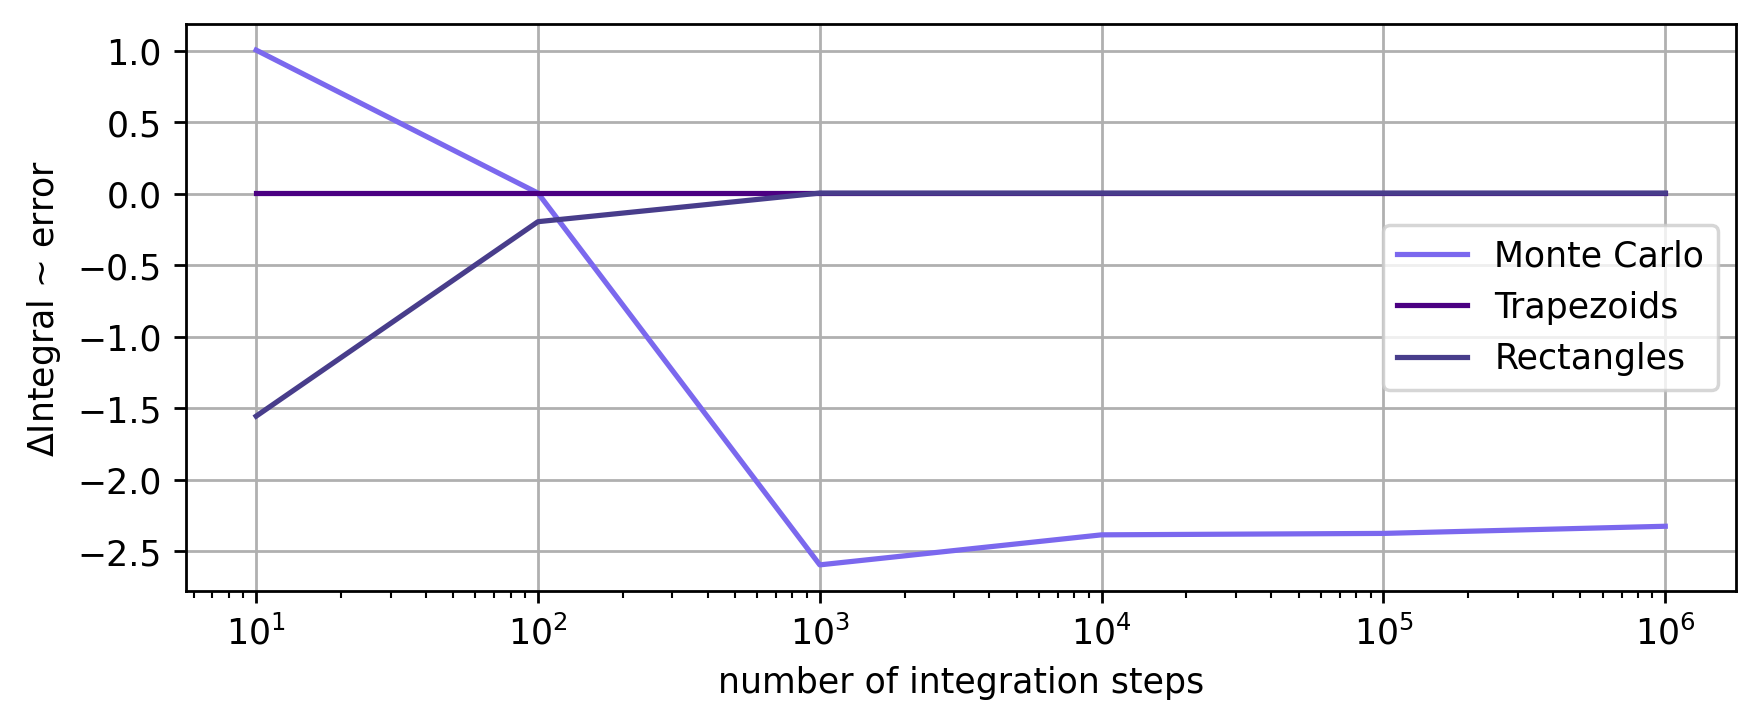

In [12]:
%matplotlib inline
plt.figure("PlotLineFunction", figsize=(8,3) , dpi=250)
plt.xscale('log')
plt.xlabel("number of integration steps")
plt.ylabel("$\Delta$Integral ~ error")
plt.plot(numbers, MC_int - analyticalIntegral, label='Monte Carlo', color='mediumslateblue')
plt.plot(numbers, Trap_int - analyticalIntegral, label='Trapezoids', color='indigo')
plt.plot(numbers, Rect_int - analyticalIntegral, label='Rectangles', color='darkslateblue')
plt.grid()
plt.legend()
plt.show()